# E-Commerce Sales Analysis

**1. Monthly Sales:** Calculate total monthly sales to identify the highest and lowest performing months.

**2. Category Sales:** Analyze sales by product category to determine the top and bottom-performing categories.

**3. Sub-Category Sales:** Break down sales by sub-category for detailed performance insights.

**4. Monthly Profit:** Evaluate monthly profit to identify the most and least profitable months.

**5. Profit by Category/Sub-Category:** Analyze profit distribution across categories and sub-categories.

**6. Customer Segment Analysis:** Compare sales and profit across customer segments to assess segment performance.

**7. Sales-to-Profit Ratio:** Calculate and analyze the efficiency of sales in generating profit across all dimensions.

In [214]:
# import some important Lib

In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

In [127]:
dataset = pd.read_csv(r"C:\Users\ayub\Desktop\Sample_Superstore.csv", encoding="latin-1")

In [128]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [129]:
dataset.shape

(9994, 21)

In [130]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [131]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [133]:
# First order Date and ship Date convert to date_time format

In [134]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])
dataset["Ship Date"] = pd.to_datetime(dataset["Ship Date"])

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [136]:
# Analysis for year, month, and week we create three column (Order year,Order month, Order week)

In [137]:
dataset["Order year"] = dataset["Order Date"].dt.year
dataset["Order month"] = dataset["Order Date"].dt.month
dataset["Order week"] = dataset["Order Date"].dt.dayofweek

In [138]:
dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order year,Order month,Order week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2,6
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2,6
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2,6


## 1. Monthly Sales Analysis

In [237]:
# Calculate total monthly sales to identify the highest and lowest performing months.

In [140]:
monthly_sales_analysis = dataset.groupby("Order month")["Sales"].sum().reset_index()
monthly_sales_analysis

,Order month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


In [141]:
fig = px.line(monthly_sales_analysis, x= "Order month", y= "Sales", title="Monthly Sales Analysis")
fig.show()

## Monthly Sales Analysis Report
**Highest Sales:** The highest sales of month is November = 352461.0710 \
**Lowest Sales:** The lowest sales of month is  February = 59751.2514


## 2. Category Sales Analysis

In [241]:
# Analyze sales by product category to determine the top and bottom-performing categories.

In [144]:
category_sales_analysis = dataset.groupby("Category")["Sales"].sum().reset_index()
category_sales_analysis


,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [145]:
fig= px.pie(category_sales_analysis, 
                      values="Sales", 
                      names="Category", 
                      hole=0.4, 
                      color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_traces(textposition = "inside", textinfo= "percent+label")
fig.update_layout(title_text = "Category Sales Analysis",title_font=dict(size= 20))
fig.show()

## Category Sales Analysis Report
**Highest sales Categories 1st rank:** The highest sales categories is **Technology**= 36.4 % \
**Highest sales Categories 2nd rank:** The highest sales categories is **Furniture**= 36.4 % \
**Lowest sales Categories:** The lowest  sales categories is **Office Supplies**= 31.3 %

## 3. Sub-Category Sales Analysis

In [243]:
# Break down sales by sub-category for detailed performance insights.

In [148]:
sub_category_sales_analysis = dataset.groupby("Sub-Category")["Sales"].sum().reset_index()
sub_category_sales_analysis

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


In [149]:
fig = px.bar(sub_category_sales_analysis, x= "Sub-Category", y="Sales", title="Sub-Category Sales Analysis")
fig.show()

## Sub-Category Sales Analysis Report
**Highest sales Sub-Categories:** The highest sales Sub-categories is **Phones**\
**Lowest sales Sub-Categories:** The lowest sales Sub-categories is **Fasteners**   

## 4.  Monthly Profit Analysis

In [247]:
# Evaluate monthly profit to identify the most and least profitable months.

In [152]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order year,Order month,Order week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6


In [153]:
monthly_profit_analysis  = dataset.groupby("Order month")["Profit"].sum().reset_index()
monthly_profit_analysis

,Order month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


In [154]:
fig = px.line(monthly_profit_analysis, x= "Order month", y="Profit", title= "Monthly_profit_analysis" )
fig.show()

## Monthly Profit Analysis Report
**Highest Profit:** The highest Profit of month is **December** = 43369.1919 \
**Lowest Profit:** The lowest Profit of month is  **january** = 9134.4461

## 5. Analysis Profit by Category/Sub-Category

In [250]:
# Analyze profit distribution across categories and sub-categories.

### Category Profit Analysis

In [157]:
category_profit_analysis = dataset.groupby("Category")["Profit"].sum().reset_index()
category_profit_analysis

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [158]:
fig= px.pie(category_profit_analysis, 
                      values="Profit", 
                      names="Category", 
                      hole=0.4, 
                      color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_traces(textposition = "inside", textinfo= "percent+label")
fig.update_layout(title_text = "Category Profit Analysis",title_font=dict(size= 20))
fig.show()

## Category Profit Analysis Report
**Highest Porfit Categories 1st rank:** The highest Profit categories is **Technology**= 50.8 % \
**Highest Profit Categories 2nd rank:** The highest sales categories is **Office Supplies**= 42.8 % \
**Lowest Profit Categories:** The lowest  sales categories is **Furniture**= 6.44 %

### Sub-Category Profit Analysis

In [161]:
sub_category_profit_analysis = dataset.groupby("Sub-Category")["Profit"].sum().reset_index()
sub_category_profit_analysis

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


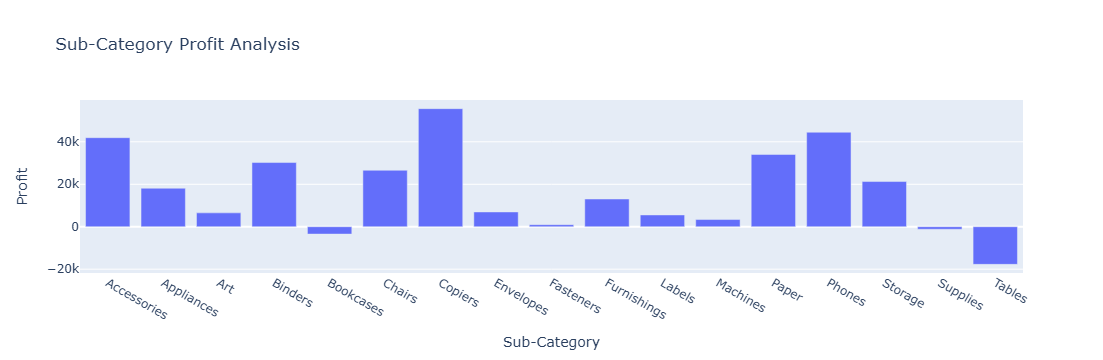

In [162]:
fig = px.bar(sub_category_profit_analysis, x= "Sub-Category", y="Profit", title="Sub-Category Profit Analysis")
fig.show()

## Sub-Category Profit Analysis Report
**Highest Profit Sub-Categories:** The highest Profit Sub-categories is **Copiers**= 55617.8249\
**Lowest Profit Sub-Categories:** The lowest Profit Sub-categories is **Tables**=  -17725.4811 

## 6. Customer Segment Analysis

In [252]:
# Compare sales and profit across customer segments to assess segment performance.

In [165]:
dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order year,Order month,Order week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2,6
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2,6
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2,6


In [174]:
sales_profit_by_segment = dataset.groupby("Segment").agg({"Sales":"sum", "Profit":"sum"}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


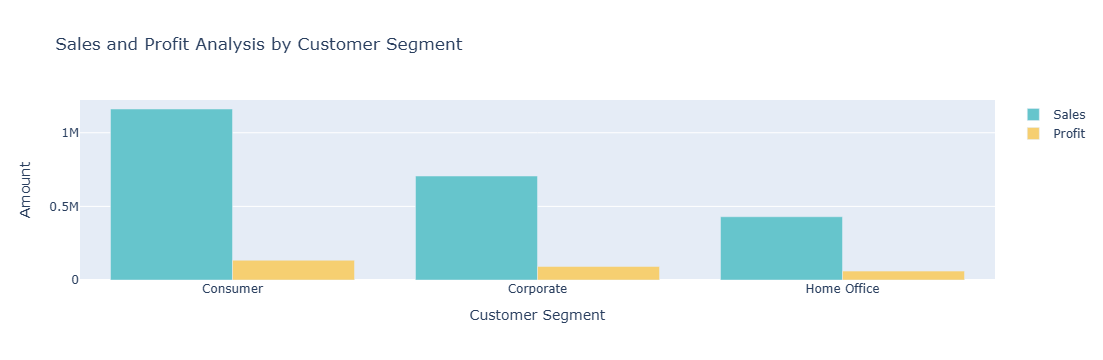

In [212]:
color_palette = colors.qualitative.Pastel

fig= go.Figure()
fig.add_traces(go.Bar(x = sales_profit_by_segment["Segment"],
                      y = sales_profit_by_segment["Sales"],
                      name = "Sales",
                      marker_color = color_palette[0]))

fig.add_traces(go.Bar(x = sales_profit_by_segment["Segment"],
                      y = sales_profit_by_segment["Profit"],
                      name = "Profit",
                      marker_color = color_palette[1]))

fig.update_layout(title = "Sales and Profit Analysis by Customer Segment",xaxis_title = "Customer Segment", yaxis_title = "Amount")

fig.show()

## Customer Segment Analysis Report
Highest Sales and Profit By:\
                          1st Rank **Consumer**\
                          2nd Rank **Corporate**\
                          3rd Rank **Home Office**


## 7. Sales-to-Profit Ratio Analysis

In [260]:
# Calculate and analyze the efficiency of sales in generating profit across all dimensions.

In [262]:
sales_profit_by_segment = dataset.groupby("Segment").agg({"Sales":"sum", "Profit":"sum"}).reset_index()
sales_profit_by_segment["sales_to_profit_ratio"] = sales_profit_by_segment["Sales"] / sales_profit_by_segment["Profit"]
print(sales_profit_by_segment[["Segment", "sales_to_profit_ratio"]])

       Segment  sales_to_profit_ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


### Sales-to-Profit Ratio Analysis Report
The highest Sales to Profit Ratio is **Consumer = 8.659471**

## Conclusion Summary
The sales and profit analysis reveals key insights into business performance across time, categories, and customer segments:

 * November recorded the highest sales, while February saw the lowest.

 * Technology and Furniture tied for the top-performing categories by sales, while Office Supplies had the lowest sales contribution.

 * At the sub-category level, Phones led in sales, whereas Fasteners recorded the least.

 * December was the most profitable month, with January yielding the lowest profit.

 * Technology was the most profitable category, contributing over half of the total profit, while Furniture lagged significantly in profitability.

 * Among sub-categories, Copiers generated the highest profit, while Tables showed a substantial loss.

 * Consumers were the top-performing customer segment in both sales and profit, followed by Corporate and Home Office.

 * The Consumer segment also had the highest sales-to-profit ratio, indicating strong profitability relative to sales.